<a href="https://colab.research.google.com/github/MrRuicy/colab/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 线性回归

Using device: cuda
Epoch [10/100], Loss: 1.5760
Epoch [20/100], Loss: 0.4030
Epoch [30/100], Loss: 0.1301
Epoch [40/100], Loss: 0.0635
Epoch [50/100], Loss: 0.0472
Epoch [60/100], Loss: 0.0433
Epoch [70/100], Loss: 0.0423
Epoch [80/100], Loss: 0.0421
Epoch [90/100], Loss: 0.0420
Epoch [100/100], Loss: 0.0420


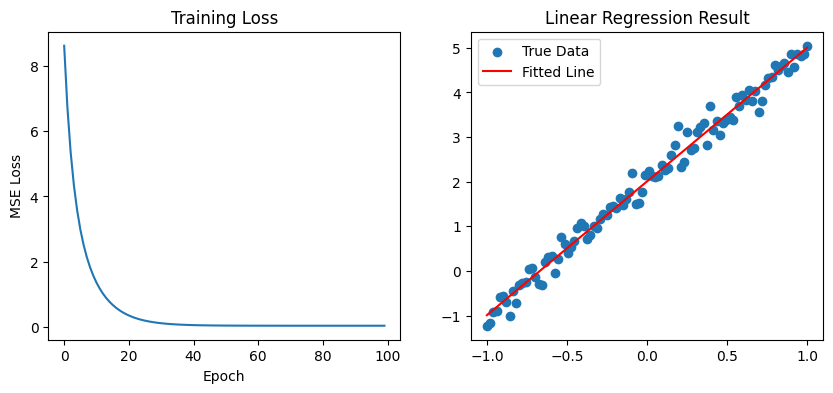

Learned weight: 2.9963, bias: 2.0074


In [1]:
# ========== 1. 导入库 ==========
import torch
import matplotlib.pyplot as plt

# 使用 GPU（如果可用）
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ========== 2. 数据准备 ==========
# 生成一个简单的线性数据 y = 3x + 2 + 噪声
torch.manual_seed(0)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 3 * X + 2 + 0.2 * torch.randn(X.size())

# 转移到设备（GPU/CPU）
X, y = X.to(device), y.to(device)

# ========== 3. 模型定义 ==========
# 参数 w 和 b，设置为需要求导
w = torch.randn(1, requires_grad=True, device=device)
b = torch.randn(1, requires_grad=True, device=device)

# 定义前向传播
def forward(x):
    return w * x + b

# ========== 4. 超参数 ==========
learning_rate = 0.1
epochs = 100

# ========== 5. 训练过程 ==========
loss_history = []

for epoch in range(epochs):
    # 前向传播
    y_pred = forward(X)
    loss = torch.mean((y_pred - y) ** 2)  # MSE Loss

    # 反向传播
    loss.backward()

    # 参数更新
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 清零梯度
    w.grad.zero_()
    b.grad.zero_()

    # 记录损失
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# ========== 6. 可视化结果 ==========
plt.figure(figsize=(10, 4))

# 损失曲线
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

# 拟合曲线
plt.subplot(1, 2, 2)
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='True Data')
plt.plot(X.cpu().numpy(), forward(X).detach().cpu().numpy(), color='red', label='Fitted Line')
plt.title("Linear Regression Result")
plt.legend()

plt.show()

print(f"Learned weight: {w.item():.4f}, bias: {b.item():.4f}")


# 多项式回归

Epoch 0: Loss = 27292.3301
Epoch 10: Loss = 43.8933
Epoch 20: Loss = 42.1861
Epoch 30: Loss = 42.0486
Epoch 40: Loss = 41.9236
Epoch 50: Loss = 41.8013
Epoch 60: Loss = 41.6816
Epoch 70: Loss = 41.5643
Epoch 80: Loss = 41.4495
Epoch 90: Loss = 41.3369


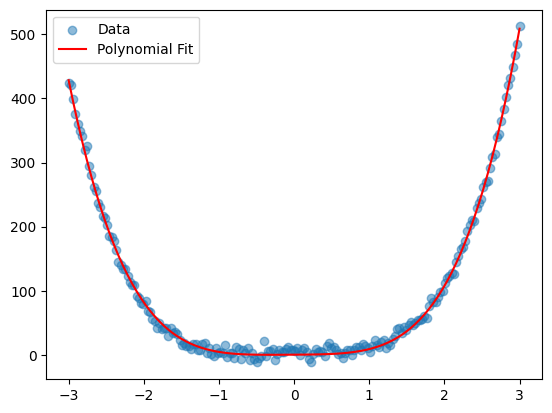

Learned coefficients:
w1=0.822, w2=0.855, w3=1.396, w4=5.686, b=0.339


In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. 生成模拟数据（非线性趋势 y = 6x^4 + x^3 - 2x^2 + 3x + 5 + 噪声）
x = torch.linspace(-3, 3, 200).unsqueeze(1)  # (200, 1)
y = 6 * x**4 + 1 * x**3 - 2 * x**2 + 3 * x + 5 + torch.randn(x.size()) * 6  # 增加适当噪声

# 构建多项式特征 [x, x^2, x^3, x^4]
x_poly = torch.cat([x, x ** 2, x ** 3, x ** 4], dim=1)  # (200, 4)

# 2. 定义模型
model = nn.Linear(in_features=4, out_features=1)

# 3. 损失函数与优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 4. 训练模型
epochs = 100
for epoch in range(epochs):
    y_pred = model(x_poly)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}')

# 5. 可视化拟合结果
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='Data', alpha=0.5)
plt.plot(x.detach().numpy(), y_pred.detach().numpy(), color='red', label='Polynomial Fit')
plt.legend()
plt.show()

# 打印学到的系数
weights = model.weight.data.numpy().flatten()
bias = model.bias.item()
print(f'Learned coefficients:\nw1={weights[0]:.3f}, w2={weights[1]:.3f}, w3={weights[2]:.3f}, w4={weights[3]:.3f}, b={bias:.3f}')
